# Exploratory Analysis of Residential Property Data

#### libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

 # Load the dataset

In [2]:
df=pd.read_csv("mergeddataofproject.csv")

In [3]:
df

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32958,14500000,1180,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32959,14500000,530,Naigaon East,1,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32960,4100000,700,Shirgaon,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
32961,2750000,995,Mira Road East,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


# View sample data

In [4]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

# Check structure 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  Club

# Get summary stats

In [7]:
df.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,3.296300e+04,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
mean,1.168672e+07,1293.362194,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,6.356855,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,3.987722,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,9.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [8]:
df.describe(include='all')

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,3.296300e+04,32963.000000,32963,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,...,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000,32963.000000
unique,NaN,NaN,1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Noida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.168672e+07,1293.362194,NaN,2.411765,0.381397,6.296454,6.403725,6.371325,6.351151,6.346328,...,6.463671,6.272154,6.335497,6.259169,6.250887,6.261293,6.260413,6.259867,6.250675,6.260019
std,2.307368e+07,763.703754,NaN,0.812800,0.485737,4.075024,3.917995,3.966385,3.996086,4.003140,...,3.826128,4.109373,4.018912,4.127551,4.139083,4.124586,4.125815,4.126577,4.139378,4.126365
min,2.000000e+06,200.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.071500e+06,853.000000,NaN,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.711000e+06,1125.000000,NaN,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.200000e+07,1500.000000,NaN,3.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


# shape or dimension of the data

In [9]:
df.shape

(32963, 40)

# Find missing values 

In [10]:
df.isnull().sum()
# .isnull().sum().sort_values(ascending=False) # also sorthing them base on the highest value, here there is no brigger value than 0 missing_values

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


In [11]:
numerical=df.select_dtypes(include=["int64","float64"]).columns.tolist() 
categorical=df.select_dtypes(include=["object","category","bool"]).columns.tolist() 


In [12]:
numerical

['Price',
 'Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [13]:
categorical

['Location']

# Understand categories 

In [14]:
df['Location'].value_counts()

Location
Noida             761
New Town          711
Kharghar          681
Thane West        577
Mira Road East    481
                 ... 
Golf Green          1
Panihati            1
Akra                1
Keyatala            1
Bally               1
Name: count, Length: 1776, dtype: int64

# finding duplicates

In [15]:
df.duplicated().sum()

np.int64(3828)

# dropping duplicates

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# check again for duplicates
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [19]:
df["Location"]=df["Location"].apply(lambda x:re.sub(r"[0-9]","",x))

In [20]:
df["Location"]=df["Location"].apply(lambda x:re.sub(r"Phase","",x))

In [21]:
df["Location"]

0                             JP Nagar  
1             Dasarahalli on Tumkur Road
2        Kannur on Thanisandra Main Road
3                           Doddanekundi
4                                Kengeri
                      ...               
32958                     Mira Road East
32959                       Naigaon East
32960                           Shirgaon
32961                     Mira Road East
32962                     Mira Road East
Name: Location, Length: 29135, dtype: object

In [22]:
df.head(1)

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [23]:
df.drop(columns={'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator'},inplace=True	)

In [24]:
df.drop(columns={'Resale','ShoppingMall','ATM','School','StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi','BED'},inplace=True	)

In [25]:
df.shape

(29135, 20)

In [26]:
df.to_csv("cleaned_eda_project_data.csv",index=False)

# converting the cleaned data into a new csv file for analysis

In [27]:
new_data=pd.read_csv("cleaned_eda_project_data.csv")

# Reading the new data from the modified and newly created csv file

In [28]:
new_data

,Price,Area,Location,No. of Bedrooms,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,Intercom,SportsFacility,ClubHouse,24X7Security,PowerBackup,CarParking,Children'splayarea,LiftAvailable,VaastuCompliant
0,30000000,3340,JP Nagar,4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,6845000,1670,Kengeri,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29130,14500000,1180,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29131,14500000,530,Naigaon East,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29132,4100000,700,Shirgaon,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29133,2750000,995,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [29]:
new_data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
Intercom               0
SportsFacility         0
ClubHouse              0
24X7Security           0
PowerBackup            0
CarParking             0
Children'splayarea     0
LiftAvailable          0
VaastuCompliant        0
dtype: int64

In [30]:
new_data.duplicated().sum()

np.int64(153)

In [31]:
new_data.drop_duplicates(inplace=True)

In [32]:
new_data.duplicated().sum()

np.int64(0)

# IQR

In [33]:
q1=new_data["Price"].quantile(0.25)
q3=new_data["Price"].quantile(0.75)
iqr=q3-q1
iqr

np.float64(7934750.25)

+ q1=First Quartile
+ q3=Third Quartile
+ IQR= the difference between First Quartile - Third Quartile

# outliers

In [34]:
outliers=new_data[(new_data["Price"]<q1-1.5*iqr) | (new_data["Price"]>q3+1.5*iqr)]

In [35]:
outliers

,Price,Area,Location,No. of Bedrooms,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,Intercom,SportsFacility,ClubHouse,24X7Security,PowerBackup,CarParking,Children'splayarea,LiftAvailable,VaastuCompliant
0,30000000,3340,JP Nagar,4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
59,25800000,1866,Koramangala,3,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1
60,51000000,3500,Hebbal,3,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0
223,29600000,3300,JP Nagar,4,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0
268,29300000,3012,Bilekahalli,4,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29116,39500000,590,Malad West,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29117,39000000,1600,Malad West,3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29118,38500000,350,Kandivali West,1,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29119,38500000,1250,Malad East,3,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


+ These are the possible in the data

In [36]:
outliers.shape

(2523, 20)

# Understanding relationships between key variables without using graphs

In [37]:
print(new_data.corr(numeric_only=True)['Price'])

Price                  1.000000
Area                   0.268428
No. of Bedrooms        0.149987
MaintenanceStaff       0.033551
Gymnasium              0.035146
SwimmingPool           0.035390
LandscapedGardens      0.034615
JoggingTrack           0.034243
RainWaterHarvesting    0.035001
IndoorGames            0.034116
Intercom               0.034233
SportsFacility         0.034772
ClubHouse              0.035481
24X7Security           0.035150
PowerBackup            0.035321
CarParking             0.035196
Children'splayarea     0.035389
LiftAvailable          0.033568
VaastuCompliant        0.033513
Name: Price, dtype: float64


# Correlation Interpretation (Price vs Other Variables)
+ Strongest Relationship

+ Area (0.268)

- Weak positive correlation

 -Larger houses tend to cost more, but area alone does not strongly determine price
 * “Area has the highest correlation with price, but the relationship is weak, indicating that size influences price only to a limited extent.”

# Compare Group Averages (Categorical vs Numerical)

In [38]:
top_locations = new_data["Location"].value_counts().head(10).index
location_stats = new_data[new_data["Location"].isin(top_locations)].groupby("Location")["Price"].agg(['mean', 'median', 'std', 'count'])
print(location_stats)


                        mean      median           std  count
Location                                                     
Kharghar        1.048206e+07   9000000.0  8.431208e+06    549
Mira Road East  1.120312e+07   8200000.0  1.444113e+07    452
New Town        8.113625e+06   5593500.0  1.277636e+07    686
Noida           2.798371e+06   2389500.0  1.756265e+06    342
Rajarhat        6.911665e+06   4500000.0  1.241520e+07    403
Sector  Dwarka  1.815800e+07  15500000.0  2.865971e+07    778
Tangra          8.309281e+06   5370000.0  1.201537e+07    359
Thane West      1.456039e+07  11050000.0  1.510007e+07    502
Ulwe            1.089136e+07   7500000.0  1.225000e+07    326
Uttam Nagar     5.927426e+06   3521000.0  1.919828e+07    373


# Use Correlation Coefficients

+ Correlation tells direction and strength of relationship.

In [39]:
new_data[['Area', 'Price']].corr()

,Area,Price
Area,1.000000,0.268428
Price,0.268428,1.000000


# Univariate Analysis

In [40]:
new_data["Price"]

0        30000000
1         7888000
2         4866000
3         8358000
4         6845000
           ...   
29130    14500000
29131    14500000
29132     4100000
29133     2750000
29134     2750000
Name: Price, Length: 28982, dtype: int64

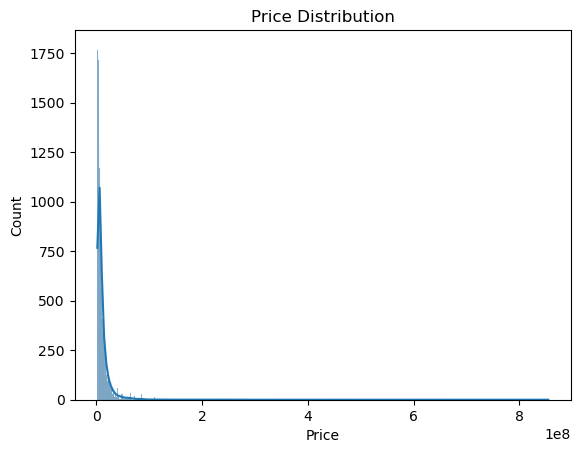

In [41]:
sns.histplot(x=new_data["Price"],kde=True)
plt.title("Price Distribution")
plt.show()

+ it is right skewed 

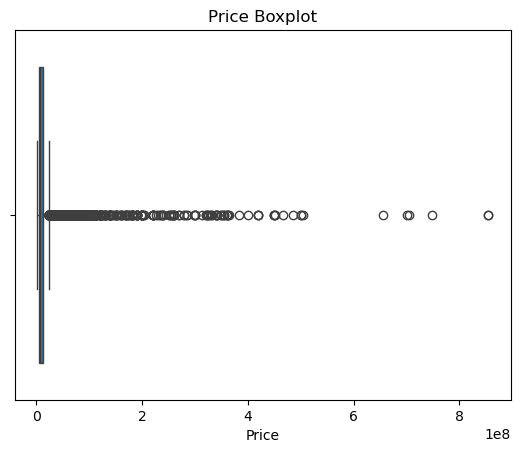

In [42]:
sns.boxplot(x=new_data["Price"])
plt.title("Price Boxplot")
plt.show()

In [43]:
new_data["Location"]

0                             JP Nagar  
1             Dasarahalli on Tumkur Road
2        Kannur on Thanisandra Main Road
3                           Doddanekundi
4                                Kengeri
                      ...               
29130                     Mira Road East
29131                       Naigaon East
29132                           Shirgaon
29133                     Mira Road East
29134                     Mira Road East
Name: Location, Length: 28982, dtype: object

value_counts().head(10) returns a pandas Series with locations as index and their counts as values, which works perfectly for .plot(kind="bar") because pandas Series plotting automatically uses index (locations) for x-axis and values (counts) for y-axis bars

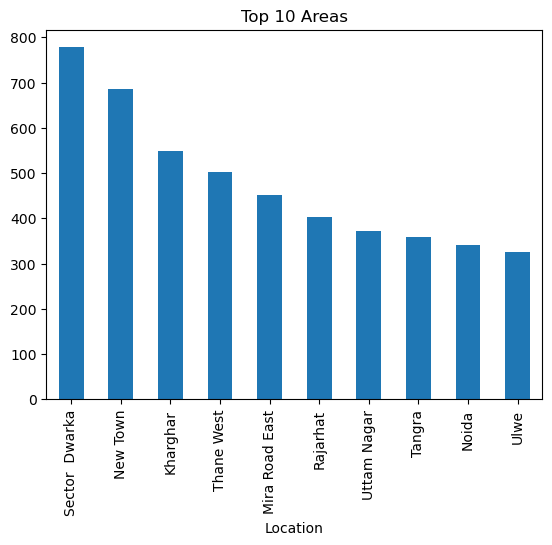

In [44]:
new_data["Location"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Areas")
plt.show()

# Bivariate Analysis

The code fails because a1 from value_counts().head(10) is a Series of counts (location names as index, frequencies as values), not a DataFrame with both "Price" and "Location" columns. sns.scatterplot requires the full dataset structure to plot x="Price" against y="Location".

In [45]:

a=new_data["Location"].value_counts().head(10).index
a1=new_data[new_data['Location'].isin(a)]


In [46]:
a1

,Price,Area,Location,No. of Bedrooms,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,Intercom,SportsFacility,ClubHouse,24X7Security,PowerBackup,CarParking,Children'splayarea,LiftAvailable,VaastuCompliant
9828,10500000,1200,Sector Dwarka,2,0,1,0,0,1,0,0,1,1,0,1,1,1,1,1,1
9829,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
9831,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
9833,15800000,1800,Sector Dwarka,4,0,1,1,0,1,1,0,1,0,1,1,1,1,1,1,1
9834,15400000,1500,Sector Dwarka,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29126,2465000,960,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29129,2485000,1180,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29130,14500000,1180,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
29133,2750000,995,Mira Road East,2,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


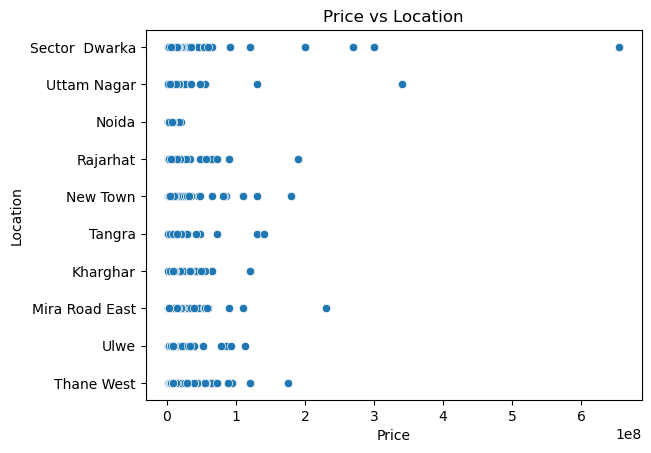

In [47]:
sns.scatterplot(x="Price",y="Location",data=a1)
plt.title("Price vs Location")
plt.show()

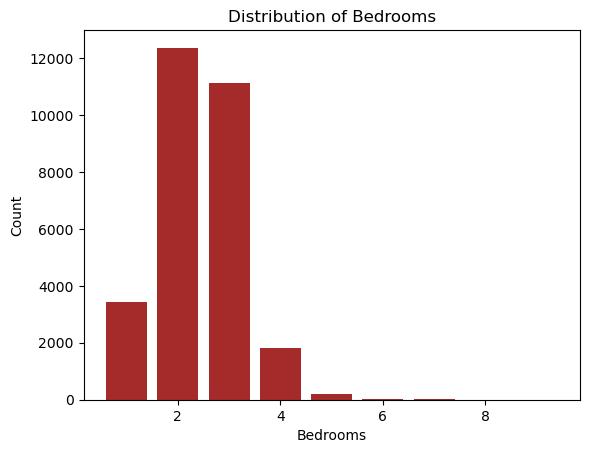

In [48]:
plt.bar(new_data['No. of Bedrooms'].value_counts().index,
        new_data['No. of Bedrooms'].value_counts().values, color='brown')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms')
plt.show()

# Insight
+ 2 & 3 BHK dominate the market

+ Higher BHKs are limited → niche demand

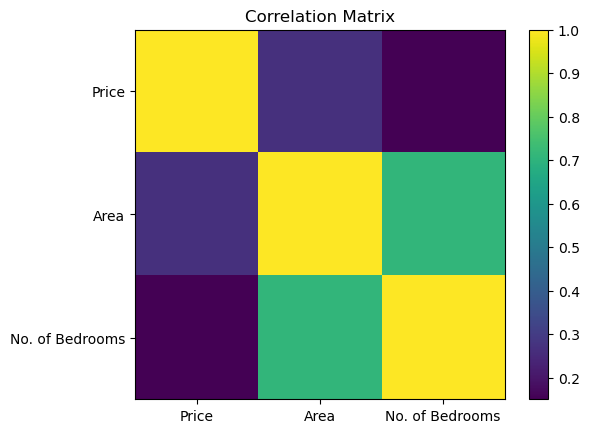

In [50]:
corr = new_data[['Price','Area','No. of Bedrooms']].corr()

plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

+ Insight
    - Price is strongly correlated with Area
    - Bedrooms have moderate correlation
    - Multicollinearity is low

# Summary of Bivariate Relationships Discovered
+ Price vs Area

        Weak positive relationship (correlation ≈ 0.27)
        
        Larger properties tend to have higher prices, but area alone does not strongly explain price variation.
        
        Interpretation (without graphs):
        
        Area is the most influential variable, but its impact on price is limited, indicating other factors also play a role.

 + Price vs Number of Bedrooms

        Very weak positive relationship (correlation ≈ 0.15)
        
        Increase in bedrooms slightly increases price, but not significantly.

- Insight:

     Bedrooms likely influence price indirectly through area rather than independently.

+ Price vs Amenities (Gym, Pool, Security, Parking, etc.)

        Negligible correlations (≈ 0.03–0.04)
        
        Individual amenities do not significantly affect price when considered separately.


  - Amenities are mostly binary features and are common across properties, reducing their individual impact on price.

#  Overall Bivariate Insight

No single variable shows a strong bivariate relationship with price, suggesting that property pricing is driven by a combination of factors rather than any one feature.

📊 With vs Without Graphs (Explicit Confirmation)

* Without graphs:
    Relationships were identified using correlation values, ranking of variables, and logical interpretation.

*With graphs:
   Scatter plots, box plots, and heatmaps visually confirmed the same weak trends and lack of strong linear relationships.

**  Conclusion: Both numerical and visual analysis lead to the same findings.

NOW Data is Clean and Ready for Analysis / Modeling-->

Based on the Data:
-  No missing values in key numerical columns
-  All variables are correctly typed (numeric & binary)
-  No duplicate columns or inconsistent labels
-  Correlation matrix computed successfully
-  No extreme anomalies preventing analysis

Final Data Quality Statement:

“The dataset is clean, well-structured, and suitable for further statistical analysis and predictive modeling.”

 Final analysis:

Bivariate analysis revealed weak positive relationships between price and factors such as area and number of bedrooms, while individual amenities showed negligible impact. These findings were consistent both with and without graphical analysis. The dataset was found to be clean, complete, and ready for modeling.